<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Deep%20learning%20with%20PyTorch/Nigerian_House_prices_prediction_Tensorflow_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.datasets.utils import download_url
from pandas import DataFrame

In [75]:
data = pd.read_csv('/content/nigerian_properties_cleaned.csv')
data.head()

,Unnamed: 0,beds,baths,toilets,state,city,price
0,0,5.0,5.0,6.0,Lagos,ajah,90000000.0
1,1,5.0,5.0,5.0,Lagos,ajah,150000000.0
2,2,4.0,4.0,4.0,Lagos,ajah,105000000.0
3,3,4.0,4.0,5.0,Lagos,ajah,85000000.0
4,4,3.0,3.0,4.0,Lagos,ajah,60000000.0


In [76]:
dataset_len = len(data)

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5500 non-null   int64  
 1   beds        5500 non-null   float64
 2   baths       5500 non-null   float64
 3   toilets     5500 non-null   float64
 4   state       5500 non-null   object 
 5   city        5500 non-null   object 
 6   price       5500 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 300.9+ KB


In [78]:
num_rows = len(data.index)
print('The total number of rows in the dataframe is:',num_rows)

The total number of rows in the dataframe is: 5500


In [79]:
data = data.drop('Unnamed: 0', axis = 1)
data.head()

,beds,baths,toilets,state,city,price
0,5.0,5.0,6.0,Lagos,ajah,90000000.0
1,5.0,5.0,5.0,Lagos,ajah,150000000.0
2,4.0,4.0,4.0,Lagos,ajah,105000000.0
3,4.0,4.0,5.0,Lagos,ajah,85000000.0
4,3.0,3.0,4.0,Lagos,ajah,60000000.0


In [80]:
data = data.drop('state', axis = 1)
data.head()

,beds,baths,toilets,city,price
0,5.0,5.0,6.0,ajah,90000000.0
1,5.0,5.0,5.0,ajah,150000000.0
2,4.0,4.0,4.0,ajah,105000000.0
3,4.0,4.0,5.0,ajah,85000000.0
4,3.0,3.0,4.0,ajah,60000000.0


In [81]:
data = data.drop('city', axis = 1)
data.head()

,beds,baths,toilets,price
0,5.0,5.0,6.0,90000000.0
1,5.0,5.0,5.0,150000000.0
2,4.0,4.0,4.0,105000000.0
3,4.0,4.0,5.0,85000000.0
4,3.0,3.0,4.0,60000000.0


Splitting and Scaling

In [82]:
y = data['price'].copy()
X = data.drop('price', axis = 1).copy()


In [83]:
y.shape, X.shape

((5500,), (5500, 3))

In [84]:
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [85]:
tf_X_train, tf_X_test, tf_y_train, tf_y_test = train_test_split(X, y, train_size = 0.1, 
                                                                 random_state = 1)

In [86]:
tf_X_train.shape

(550, 3)

In [87]:
inputs = tf.keras.Input(shape=(3,))
hidden = tf.keras.layers.Dense(64, activation='relu')(inputs)
hidden = tf.keras.layers.Dense(64, activation='relu')(hidden)
outputs = tf.keras.layers.Dense(1, activation='linear')(hidden)

tf_model = tf.keras.Model(inputs, outputs)


tf_model.compile(
    optimizer='adam',
    loss='mse'
)

history = tf_model.fit(
    tf_X_train,
    tf_y_train,
    validation_split=0.12,
    batch_size=32,
    epochs=10
)

Epoch 1/10
16/16 [==============================] - 1s 11ms/step - loss: 297736788045201408.0000 - val_loss: 100960224269041664.0000
Epoch 2/10
16/16 [==============================] - 0s 4ms/step - loss: 297736788045201408.0000 - val_loss: 100960224269041664.0000
Epoch 3/10
16/16 [==============================] - 0s 3ms/step - loss: 297736788045201408.0000 - val_loss: 100960224269041664.0000
Epoch 4/10
16/16 [==============================] - 0s 3ms/step - loss: 297736788045201408.0000 - val_loss: 100960224269041664.0000
Epoch 5/10
16/16 [==============================] - 0s 3ms/step - loss: 297736788045201408.0000 - val_loss: 100960224269041664.0000
Epoch 6/10
16/16 [==============================] - 0s 4ms/step - loss: 297736753685463040.0000 - val_loss: 100960224269041664.0000
Epoch 7/10
16/16 [==============================] - 0s 4ms/step - loss: 297736753685463040.0000 - val_loss: 100960215679107072.0000
Epoch 8/10
16/16 [==============================] - 0s 4ms/step - loss: 297

In [88]:
tf_rmse = np.sqrt(tf_model.evaluate(tf_X_test, tf_y_test))

155/155 [==============================] - 0s 1ms/step - loss: 7273014880796409856.0000


In [89]:
output_col = [data.columns[-1]]
output_col

['price']

In [90]:
input_cols = data.columns[0:3]
input_cols

Index(['beds', 'baths', 'toilets'], dtype='object')

In [91]:
def dataframe_to_arrays(data):
  # Make a copy of the original dataset
  dataframe = data.copy(deep = True)


  # Extract input & outputs as numpy arrays
  inputs_array = dataframe[input_cols].to_numpy()
  targets_array = dataframe[output_col].to_numpy()
  return inputs_array, targets_array.reshape((5500, 1))

In [92]:
inputs_array, targets_array = dataframe_to_arrays(data)
inputs_array, targets_array

(array([[5., 5., 6.],
        [5., 5., 5.],
        [4., 4., 4.],
        ...,
        [0., 0., 0.],
        [4., 4., 5.],
        [0., 0., 0.]]), array([[9.00e+07],
        [1.50e+08],
        [1.05e+08],
        ...,
        [2.00e+08],
        [7.40e+07],
        [2.50e+08]]))

In [93]:
inputs = torch.Tensor(inputs_array)
targets = torch.Tensor(targets_array)
print(inputs)
print(targets)
inputs.shape, targets.shape

tensor([[5., 5., 6.],
        [5., 5., 5.],
        [4., 4., 4.],
        ...,
        [0., 0., 0.],
        [4., 4., 5.],
        [0., 0., 0.]])
tensor([[9.0000e+07],
        [1.5000e+08],
        [1.0500e+08],
        ...,
        [2.0000e+08],
        [7.4000e+07],
        [2.5000e+08]])


(torch.Size([5500, 3]), torch.Size([5500, 1]))

In [94]:
inputs.dtype, targets.dtype

(torch.float32, torch.float32)

Create PyTorch datasets and dataloader

In [95]:
dataset = TensorDataset(inputs, targets)

In [96]:
val_percent = 0.1
val_size = int(num_rows * val_percent)
train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

In [97]:
train_size, val_size

(4950, 550)

Creating data loader for training and validation

In [98]:
batch_size = 16

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

In [99]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[0., 0., 0.],
        [4., 2., 3.],
        [3., 3., 4.],
        [0., 0., 0.],
        [5., 5., 6.],
        [0., 0., 0.],
        [4., 5., 5.],
        [5., 6., 7.],
        [6., 7., 7.],
        [2., 0., 0.],
        [5., 5., 6.],
        [3., 3., 4.],
        [0., 0., 0.],
        [4., 5., 5.],
        [0., 0., 0.],
        [4., 4., 5.]])
targets: tensor([[1.5000e+08],
        [2.5000e+09],
        [9.0000e+07],
        [2.0000e+06],
        [1.2000e+08],
        [5.5000e+09],
        [8.5000e+07],
        [3.0000e+08],
        [2.0000e+08],
        [2.0000e+08],
        [5.5000e+08],
        [1.2500e+08],
        [1.4000e+07],
        [6.5000e+07],
        [2.5000e+07],
        [1.2000e+08]])


In [100]:
input_size = len(input_cols)
output_size = len(output_col)

In [116]:
class HousingModel(nn.Module):

  def __init__(self):
    
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)


  def forward(self, xb):
    out = self.linear(xb)
    return out


  def training_step(self, batch):
    X, y = batch
    out = self(X)                 
    loss = F.mse_loss(out, y)    
    return loss 


  def validation_step(self, batch):
    X, y = batch
    out = self(X)                
    loss = F.mse_loss(out, y)    
    return {'val_loss': loss.detach()}  


  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()   
    return {'val_loss': epoch_loss.item()} 


  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))  




model = HousingModel()    

In [117]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)


def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)

  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history    

In [118]:
result = evaluate(model, val_loader)
result

{'val_loss': 1.856895781479383e+18}

In [121]:
learning_rate=5e-7
history = fit(20, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: 1849724904081981440.0000
Epoch [1], val_loss: 1849213631175065600.0000
Epoch [2], val_loss: 1848719263259426816.0000
Epoch [3], val_loss: 1848245786064715776.0000
Epoch [4], val_loss: 1847792512396165120.0000
Epoch [5], val_loss: 1847356556035751936.0000
Epoch [6], val_loss: 1846939016495104000.0000
Epoch [7], val_loss: 1846537694750965760.0000
Epoch [8], val_loss: 1846151903608569856.0000
Epoch [9], val_loss: 1845783154896404480.0000
Epoch [10], val_loss: 1845428974713307136.0000
Epoch [11], val_loss: 1845090187692998656.0000
Epoch [12], val_loss: 1844765556884897792.0000
Epoch [13], val_loss: 1844454395094237184.0000
Epoch [14], val_loss: 1844156977198923776.0000
Epoch [15], val_loss: 1843872066248376320.0000
Epoch [16], val_loss: 1843598700169920512.0000
Epoch [17], val_loss: 1843336878963556352.0000
Epoch [18], val_loss: 1843087014946144256.0000
Epoch [19], val_loss: 1842848283483963392.0000


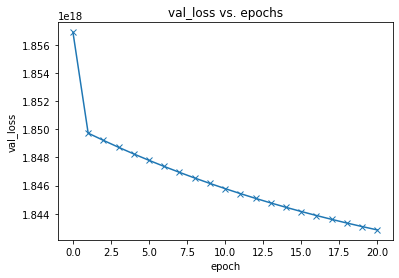

In [122]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');